
# Trabalho 1 - Aplicações em Machine Learning

Este notebook é dedicado ao primeiro trabalho prático do curso, onde diferentes técnicas de aprendizado supervisionado
são aplicadas a um conjunto de dados específico. Os principais tópicos abordados incluem:

1. Limpeza e Pré-processamento dos Dados
2. Treinamento de Modelos de Classificação
3. Avaliação e Comparação de Desempenho dos Modelos


# SVM Classifier

https://www.youtube.com/watch?v=efR1C6CvhmE

https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/


Métricas

https://en.wikipedia.org/wiki/Precision_and_recall

Pipeline

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines


## Exercício:

Implemente o Classificador SVM usando os Kernels Linear e RBF. Utilize como ponto de partida este Notebook em anexo.

E seguida, usando validação cruzada K-fold (K=5), ajuste os parâmetros (usando GridSearchCV) para ambos os classificadores (Linear e RBF), parâmetro de regularização C, e  γ  (gamma, somente RBF) e informe qual a melhor configuração para obter melhor (i) Acurácia, (ii) Precision, (iii) Recall e (iv) F1. Utilize pipelines para resolver esta atividade.

    Você pode encontrar informações sobre as métricas nos links abaixo:
    https://en.wikipedia.org/wiki/Precision_and_recall

=============================================

Em detalhes, você deve fazer o seguinte (os itens 1 e 2 tem apenas caráter didático):

1) Padronização dos dados de entrada (média 0 e desvio-padrão 1); Dica: lembra do StandarScaler?
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

2) Validação Cruzada usando o GridSearchCV (avaliando o grid de Parâmetros) usando diferente métricas: (i) Acurácia, (ii) Precision, (iii) Recall e (iv) F1. Dica: checar o parâmetro 'scoring'.

        GridSearchCV
        https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

        Lista de valores string do parâmetro 'scoring' que você pode utilizar:
        https://scikit-learn.org/stable/modules/model_evaluation.html

3) Pipeline: agora refaça os itens acima mas usando Pipeline. Você deve criar *dois pipelines* -- um para o kernel 'linear' (pipe_svc_linear) e outro para o kernel 'rbf' (pipe_svc_rbf) -- ambos de dois passos:

    (i) 'scaler': escale/padronize os dados (média=0, desv.pad=1);
    (ii) 'svm_linear' ou 'svm_rbf', respectivamente para cada kernel: LINEAR ou RBF.
        https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
        https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9

4) Por fim, agora faça a validação cruzada (da mesma forma feita no item 2) em ambos os pipelines.

Obs: Esta atividade foi dividida em itens 1-4 apenas pra ficar didática. Os itens que realmente importam são os 3 e 4, pois contemplam os itens 1 e 2.

Bom trabalho! :)


### Importing Libraries

In [1]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Loading Data

In [2]:
#Load dataset
cancer = datasets.load_breast_cancer()

### Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.



In [3]:
# FEATURES
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# CLASS / TARGET (0:Malign, 1:Benign)
df_cancer['CLASS'] = cancer.target

# print the cancer data features/target (top 5 records)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,CLASS
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# print data(feature)shape
df_cancer.shape

(569, 31)

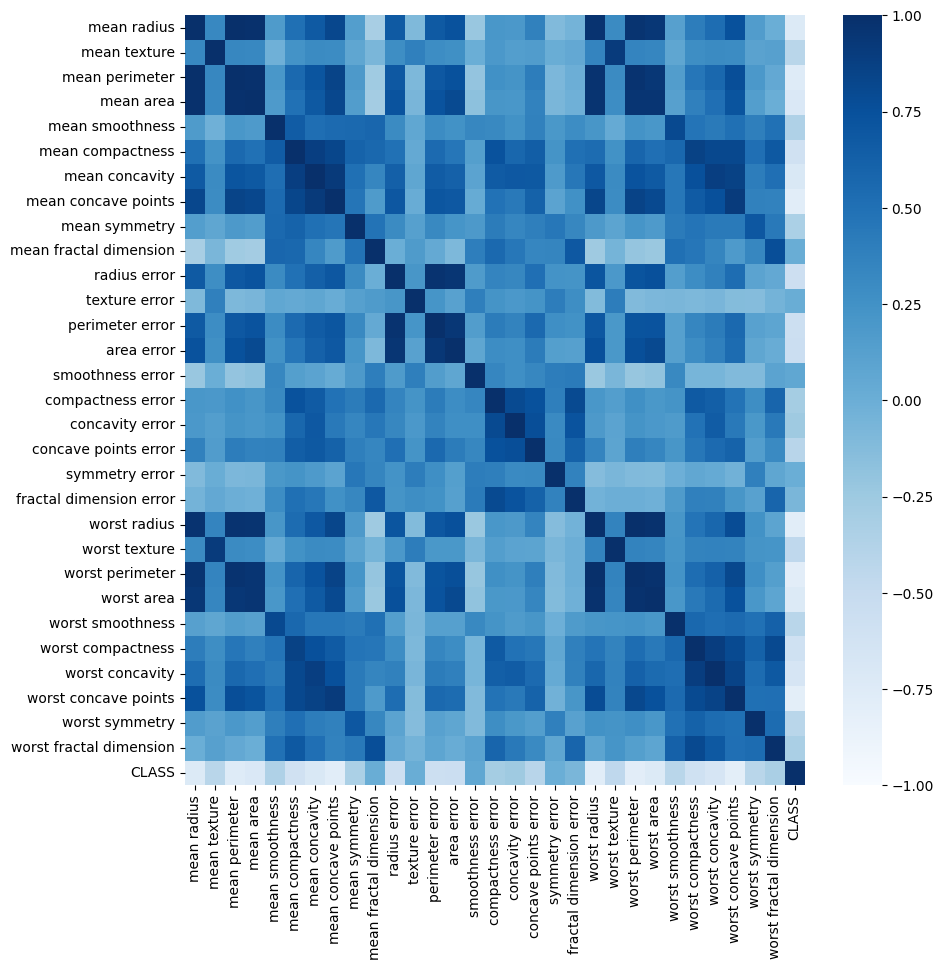

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
#sns.heatmap(df, annot=True, fmt=".3f", linewidths=.5, ax=ax);

sns.heatmap(df_cancer.corr(),  vmin=-1, vmax=1, cmap="Blues");

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [6]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = df_cancer.drop(['CLASS'], axis=1)
y = df_cancer['CLASS']

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, \
y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

### Generating Model

Let's build support vector machine model.

First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in `SVC()` function.

Then, fit your model on train set using `fit()` and perform prediction on the test set using predict().

In [7]:
# Padronizar/ Normalizar / Escalar os dados
# COLOQUE O CÓDIGO AQUI
#

In [8]:
#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

In [9]:
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

### Evaluating the Model

Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [11]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958041958041958


For further evaluation, we can also check **precision** and **recall** of model.



In [12]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

# CALCULAR A MEDIDA F1

Precision: 0.9560439560439561
Recall: 0.9775280898876404


### Testing another (RBF) Kernel

In [13]:
#Create a svm Classifier
clf_svm = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [14]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.951048951048951
Precision: 0.9361702127659575
Recall: 0.9887640449438202


### CROSS-VALIDATION

Performing cross validation to find the best hyperparameters(C, $\gamma$ (gamma)), kernels & finding accuracy on training data:

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
import time

In [17]:
param_grid = [{'kernel':['linear'],
                    'C':[0.001, 0.1, 1, 10, 100]},
              {'kernel':['rbf'],
                    'C': [0.001, 0.1, 1, 10, 100],
                    'gamma': [0.5, 5, 10, 50, 100]}]

In [18]:
# Se quiser utilizar outros scores:
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [19]:
clf_svm = svm.SVC()

In [20]:
start = time.time()

gsvm = GridSearchCV(clf_svm, param_grid, cv=5, verbose=8, ) #, scoring='f1', n_jobs=5)
gsvm.fit(X_train,y_train)

end = time.time()

print("Time required: %.3f(s)" % (end-start))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.965 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.906 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.918 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.953 total time=   1.4s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.929 total time=   0.3s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.9s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.941 total time=   0.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.906 total time=   0.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.965 total time=   3.9s
[CV 2/5] END ................C=1, kernel=linear

In [21]:
print("Best HyperParameter: ", gsvm.best_params_)
print("Best Accuracy: %.2f%%" % (gsvm.best_score_*100))

Best HyperParameter:  {'C': 10, 'kernel': 'linear'}
Best Accuracy: 96.48%


In [22]:
# @title
# REPITAM O PROCESSO PARA RECALL PRECISION E F1
#

Appying model on testing data and finding accuracy on it.


In [23]:
gsvm.best_estimator_

SVC(C=10, kernel='linear')

In [24]:
clf_svm_best = gsvm.best_estimator_

# only if refit==False
clf_svm_best.fit(X_train, y_train)

y_pred = clf_svm_best.predict(X_test)

In [25]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:   ", metrics.recall_score(y_test, y_pred))
# Confusion Matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.965034965034965
Precision: 0.9772727272727273
Recall:    0.9662921348314607
Confusion Matrix:
 [[52  2]
 [ 3 86]]


In [26]:
? metrics.confusion_matrix

## PIPELINES

In [27]:
# FAZER USANDO PIPELINES

## EXEMPLO (TESTE)

In [28]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [29]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 random_state=0)

In [30]:
X.shape, y.shape

((100, 20), (100,))

In [31]:

# Normalizar os dados para melhorar a performance dos algoritmos que dependem da escala das variáveis.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [33]:
pipe.score(X_test, y_test)

0.88

In [34]:
param_grid = [{'svc__kernel': ['rbf'],
               'svc__gamma': ['scale'],
               'svc__C': [1.0, 10]}]

In [35]:
cv_pipe = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=8)

In [36]:
cv_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=8,
             param_grid=[{'svc__C': [1.0, 10], 'svc__gamma': ['scale'],
                          'svc__kernel': ['rbf']}],
             verbose=1)

In [37]:
cv_pipe.score(X_test, y_test)

0.76

In [38]:
cv_pipe.cv_results_

{'mean_fit_time': array([0.02651968, 0.01844506]),
 'std_fit_time': array([0.00436839, 0.00986899]),
 'mean_score_time': array([0.00992441, 0.00379486]),
 'std_score_time': array([0.00680017, 0.00412467]),
 'param_svc__C': masked_array(data=[1.0, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_svc__gamma': masked_array(data=['scale', 'scale'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_svc__kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 1.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'},
  {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}],
 'split0_test_score': array([0.73333333, 0.8       ]),
 'split1_test_score': array([0.73333333, 0.73333333]),
 'split2_test_score': array([0.86666667, 0.86666667]),
 'split3_test_score': array([0.8, 0.8]),
 'split4_test_score': array(

In [39]:
cv_pipe.best_params_

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

#### USANDO GRID SEARCH CV

In [40]:
params_svc = [{'svc__kernel': ['rbf'],
               'svc__gamma': ['scale', 1e-4, 1e-3, 1e-2, 0.05, 0.1, 1.0, 10, 100],
               ############ COMENTAR OTIMIZAÇÃO
               #'svc__C': [1, 10, 100, 1000]}]
               'svc__C': [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 150, 200]}]

In [41]:
param_grid = params_svc

pipe_cv = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=8)

In [42]:
pipe_cv.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=8,
             param_grid=[{'svc__C': [10, 20, 30, 40, 50, 60, 70, 80, 100, 120,
                                     150, 200],
                          'svc__gamma': ['scale', 0.0001, 0.001, 0.01, 0.05,
                                         0.1, 1.0, 10, 100],
                          'svc__kernel': ['rbf']}],
             verbose=1)

In [43]:
pipe_cv.best_params_

{'svc__C': 30, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [44]:
pipe_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=30, gamma=0.01))])

In [45]:
SVC_best = pipe_cv.best_estimator_

In [46]:
SVC_best.score(X_test, y_test)

0.72

In [47]:
means = pipe_cv.cv_results_['mean_test_score']
stds = pipe_cv.cv_results_['std_test_score']
Lparams = pipe_cv.cv_results_['params']

for mean, std, params in zip(means, stds, Lparams):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

0.813 (+/-0.100) for {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
0.720 (+/-0.433) for {'svc__C': 10, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}
0.747 (+/-0.131) for {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
0.787 (+/-0.177) for {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.813 (+/-0.100) for {'svc__C': 10, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}
0.800 (+/-0.189) for {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.560 (+/-0.181) for {'svc__C': 10, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
0.613 (+/-0.352) for {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel': 'rbf'}
0.507 (+/-0.065) for {'svc__C': 10, 'svc__gamma': 100, 'svc__kernel': 'rbf'}
0.813 (+/-0.100) for {'svc__C': 20, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
0.733 (+/-0.404) for {'svc__C': 20, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}
0.800 (+/-0.119) for {'svc__C': 20, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
0.813 (+/-0.177) for {'svc__C': 20, 'svc__gamma': 0.01, '

In [48]:
SVC_best = SVC(C=1.0, gamma='scale', kernel='rbf', verbose=True)

In [49]:
SVC_best.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

In [50]:
SVC_best.score(X_test, y_test)

0.88

In [51]:
# importando e definindo a coluna target do DF
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['CLASS'] = cancer.target

print(df_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [52]:

# Normalizar os dados para melhorar a performance dos algoritmos que dependem da escala das variáveis.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Separando a coluna target e padronizando os dados
from sklearn.preprocessing import StandardScaler

X = df_cancer.drop('CLASS', axis=1)
y = df_cancer['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X.columns).head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [53]:
# Definindo os parâmetros e executando os testes
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_linear = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 15, 25, 50, 75, 100], 'gamma': [0.1, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.001, 0.0001]}

# SVM com kernel linear
svc_linear = SVC(kernel='linear')
grid_linear = GridSearchCV(estimator=svc_linear, param_grid=param_grid_linear, scoring='accuracy', cv=5)
grid_linear.fit(X_scaled, y)

# SVM com kernel RBF
svc_rbf = SVC(kernel='rbf')
grid_rbf = GridSearchCV(estimator=svc_rbf, param_grid=param_grid_rbf, scoring='accuracy', cv=5)
grid_rbf.fit(X_scaled, y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15, 25, 50, 75, 100],
                         'gamma': [0.1, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09,
                                   0.001, 0.0001]},
             scoring='accuracy')

In [54]:
# Resultados LINEAR
means = grid_linear.cv_results_['mean_test_score']
stds = grid_linear.cv_results_['std_test_score']
Lparams = grid_linear.cv_results_['params']

for mean, std, params in zip(means, stds, Lparams):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

0.975 (+/-0.013) for {'C': 0.1}
0.974 (+/-0.016) for {'C': 0.2}
0.972 (+/-0.017) for {'C': 0.3}
0.972 (+/-0.017) for {'C': 0.4}
0.972 (+/-0.017) for {'C': 0.5}
0.975 (+/-0.017) for {'C': 0.6}
0.975 (+/-0.017) for {'C': 0.7}
0.974 (+/-0.016) for {'C': 0.8}
0.974 (+/-0.016) for {'C': 0.9}
0.970 (+/-0.021) for {'C': 1}
0.967 (+/-0.026) for {'C': 10}
0.960 (+/-0.047) for {'C': 100}


In [55]:
# Resultados RBF
means = grid_rbf.cv_results_['mean_test_score']
stds = grid_rbf.cv_results_['std_test_score']
Lparams = grid_rbf.cv_results_['params']

for mean, std, params in zip(means, stds, Lparams):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

0.935 (+/-0.049) for {'C': 0.1, 'gamma': 0.1}
0.947 (+/-0.046) for {'C': 0.1, 'gamma': 0.01}
0.946 (+/-0.034) for {'C': 0.1, 'gamma': 0.03}
0.947 (+/-0.031) for {'C': 0.1, 'gamma': 0.05}
0.939 (+/-0.053) for {'C': 0.1, 'gamma': 0.07}
0.935 (+/-0.049) for {'C': 0.1, 'gamma': 0.08}
0.935 (+/-0.049) for {'C': 0.1, 'gamma': 0.09}
0.791 (+/-0.081) for {'C': 0.1, 'gamma': 0.001}
0.627 (+/-0.008) for {'C': 0.1, 'gamma': 0.0001}
0.960 (+/-0.018) for {'C': 1, 'gamma': 0.1}
0.967 (+/-0.020) for {'C': 1, 'gamma': 0.01}
0.974 (+/-0.029) for {'C': 1, 'gamma': 0.03}
0.974 (+/-0.027) for {'C': 1, 'gamma': 0.05}
0.974 (+/-0.029) for {'C': 1, 'gamma': 0.07}
0.963 (+/-0.013) for {'C': 1, 'gamma': 0.08}
0.961 (+/-0.014) for {'C': 1, 'gamma': 0.09}
0.947 (+/-0.025) for {'C': 1, 'gamma': 0.001}
0.794 (+/-0.065) for {'C': 1, 'gamma': 0.0001}
0.947 (+/-0.043) for {'C': 10, 'gamma': 0.1}
0.979 (+/-0.014) for {'C': 10, 'gamma': 0.01}
0.977 (+/-0.018) for {'C': 10, 'gamma': 0.03}
0.968 (+/-0.028) for {'C': 10, 

In [56]:
print("Melhores parâmetros para SVM com kernel linear:", grid_linear.best_params_)
print("Melhores parâmetros para SVM com kernel RBF:", grid_rbf.best_params_)

Melhores parâmetros para SVM com kernel linear: {'C': 0.1}
Melhores parâmetros para SVM com kernel RBF: {'C': 10, 'gamma': 0.01}


In [57]:

# Normalizar os dados para melhorar a performance dos algoritmos que dependem da escala das variáveis.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.pipeline import Pipeline

# Pipeline com kernel linear
pipe_svc_linear = Pipeline([('scaler', StandardScaler()), ('svm_linear', SVC(kernel='linear'))])

# Pipeline com kernel RBF
pipe_svc_rbf = Pipeline([('scaler', StandardScaler()), ('svm_rbf', SVC(kernel='rbf'))])


In [58]:
from sklearn.model_selection import cross_val_score
import numpy as np


def print_metrics(scores):
    print("Acurácia Média:", np.mean(scores))
    print("Desvio Padrão:", np.std(scores))

# Linear com validação cruzada de 5
scores_linear = cross_val_score(pipe_svc_linear, X, y, cv=5, scoring='accuracy')
print("SVM com kernel linear:")
print_metrics(scores_linear)

# RBF com validação cruzada de 5
scores_rbf = cross_val_score(pipe_svc_rbf, X, y, cv=5, scoring='accuracy')
print("\nSVM com kernel RBF:")
print_metrics(scores_rbf)


SVM com kernel linear:
Acurácia Média: 0.9718987734823784
Desvio Padrão: 0.008556812051479262

SVM com kernel RBF:
Acurácia Média: 0.9736376339077782
Desvio Padrão: 0.014678541667933545
